## Otim Robert B31336

Use the provided dataset  "Question 3.csv.xlsx" to generate;

Objective: Develop a statistical model that can classify human text and predict its implication.

Scope: Focus on data from social media posts and/or media articles.

1. Data collection: Use primary or secondary human-generated text data that is sentimentlabelled.

2. Data Preprocessing: Clean and transform the dataset suitably for downstream analyses.

3. Exploratory Data Analysis (EDA):

    a. Explore text frequency distribution

    b. Explore sentiment-label distribution

    c. Generate suitable visuals that highlight key insights

4. Build, Evaluate, and Optimize Predictive Models:

    a. Generate a supervised machine learning model that can predict the text sentiment.

    b. Validate the above model using hypothetically-generated text data.

    c. Use an unsupervised machine learning model to classify the text data.

#### Import Required Libraries

In [1]:
import numpy as np  # For arrays and numerical operations  
import pandas as pd  # For data manipulation and analysis  
import matplotlib.pyplot as plt  # For visualizations  
import seaborn as sns  # For visualizations 

from sklearn.decomposition import NMF  # Performs topic modeling using Non-Negative Matrix Factorization  
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning using grid search  
from sklearn.metrics import accuracy_score  # Computes accuracy of the model  
from sklearn.metrics import confusion_matrix  # Creates a confusion matrix for classification results  
from sklearn.metrics import f1_score  # Measures model performance with the F1 score  
from wordcloud import WordCloud  # Creates word clouds for text visualization  
from collections import Counter  # Provides high-performance counting of elements  

from nltk.corpus import stopwords  # Contains common stopwords to remove from text
import nltk  # For text processing  
import string  # Provides functions to handle string operations like punctuation removal  
import itertools  # Functions that help in creating iterators for looping  

In [2]:
# Download necessary NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rotim\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

### Exploratory Data Analysis

## Step 2: Load the data

In [2]:
# Load  training dataset files
text_data = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)

# Display the first few rows to inspect the structure
text_data

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


The dataset has 1000 rows and 2 columns

In [4]:
# Rename columns
text_data.columns = ['Review', 'Sentiment']


# Display the first few rows to inspect the structure
text_data

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


The dataset contains two key columns: "Review" (text content) and "Sentiment" (classification categories).

## Step 3: Perform exploratory data analysis

### Prepare the data

### Checking for any Duplicates 

In [5]:
# Check for duplicate rows
text_data['Review'].duplicated().sum()

np.int64(10)

#### 10 duplicates records were found

In [6]:
text_data.isna().sum()

Review       0
Sentiment    0
dtype: int64

### Remove Duplicates

In [7]:
# Remove duplicate articles while keeping the first occurrence
text_data = text_data.drop_duplicates(subset=['Review'], keep='first')

# Reset the index
text_data = text_data.reset_index(drop=True)

# Display the number of remaining records
print(f"Dataset after removing duplicate articles: {text_data.shape}")

Dataset after removing duplicate articles: (990, 2)


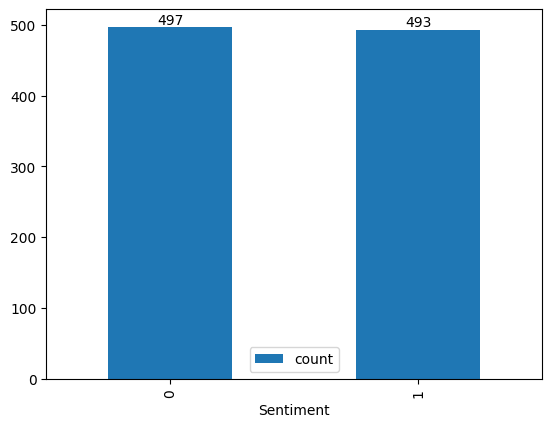

In [8]:
# Plot the distribution of the labels

category_plot = pd.DataFrame(text_data['Sentiment'].value_counts()).plot.bar()
for c in category_plot.containers:
    category_plot.bar_label(c)
plt.show()

##### This bar chart represents the distribution of sentiments in a dataset, where:

-0 represents negative sentiment

-1 represents positive sentiment

##### Key Observations

-Balanced Sentiment Distribution

-There are 497 negative reviews and 493 positive reviews, showing that the dataset is almost evenly split between positive and negative sentiments.

-Slightly More Negative Reviews

-The difference is minimal (only 4 more negative reviews than positive), which means there is no significant bias in the dataset.
Well-Balanced Dataset

-A balanced dataset like this is ideal for machine learning models (e.g., sentiment analysis) as it reduces bias and helps ensure more accurate predictions.

##### Possible Interpretations Based on Context

-If analyzing product reviews: The product has received an equal mix of positive and negative reviews, suggesting a diverse customer experience.

-If using this for sentiment analysis training: The dataset is well-balanced, meaning a model trained on this data will likely perform fairly well in distinguishing between positive and negative sentiments.

### Visualize The Frequency of Words in the variable "Articles"

In [9]:
import string
from collections import Counter  # Import Counter

def get_word_counts(text_data):
    all_words = []
    for text in text_data:
        # Remove punctuation marks
        text = text.translate(str.maketrans('', '', string.punctuation))
        words = text.split()
        all_words.extend(words)

    # Count word occurrences
    word_counts = Counter(all_words)
    word_freq = pd.DataFrame({'word': list(word_counts.keys()), 'count': list(word_counts.values())})
    word_freq = word_freq.sort_values(by='count', ascending=False)
    return word_freq

# Ensure text_data['Articles'] exists and is a valid column
word_freq = get_word_counts(text_data['Review'])  
word_freq.head(20)

,word,count
12,the,413
73,and,307
15,I,306
2,is,241
9,it,219
18,a,206
7,to,195
65,this,150
119,phone,145
69,my,130


Observations:

-Looking at the word frequency, the occurrence of the top 20 words are displayed. 

-The word 'the' has a high frequency followed by 'and'.

-All these are stopwords need to be removed.

### Removing stopwords

In [ ]:
# Define a basic set of stopwords since NLTK download failed
custom_stopwords = set(stopwords.words('english') + list(string.punctuation))

# Tokenize and clean the text data
def clean_and_tokenize(text):
    words = text.lower().split()  # Convert to lowercase and split
    words = [word.strip(string.punctuation) for word in words if word not in custom_stopwords]
    return words

# Flatten the list of words from all articles
all_words = [word for article in text_data['Review'].dropna() for word in clean_and_tokenize(article)]

### Check for Outliers in the feature variable

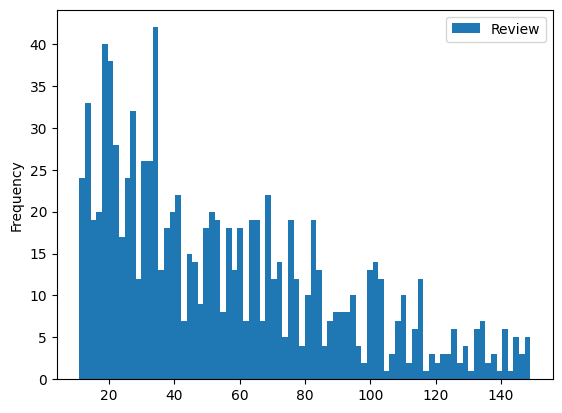

In [11]:
pd.DataFrame(text_data['Review'].apply(len)).plot.hist(bins=80)
plt.show()

##### Key Observations

-Right-Skewed Distribution

-The highest frequency is observed on the left side, with values decreasing towards the right.

-This suggests that lower values (e.g., short reviews, low review scores, or frequent words) are more common, while higher values (e.g., long reviews, high scores, or less frequent words) are less common.

##### Peak in the Lower Range

-The most frequent values fall between 10 to 50 (approx.), indicating that most reviews fall within this range.
Decreasing Trend

-As values increase, the frequency gradually declines, showing that fewer instances exist at higher values.

-This could indicate that longer or highly detailed reviews are less common compared to shorter or more frequent reviews.

##### Possible Interpretations Based on Context

-If this represents review lengths: Most reviews tend to be short, while longer reviews are less common.

-If this represents word frequencies: A few words are used very frequently, while most words are used infrequently.

-If this represents review scores: Lower scores might be more frequent, while higher scores are less common.

In [12]:
text_data[text_data['Review'].apply(len) > 5]

,Review,Sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
985,The screen does get smudged easily because it ...,0
986,What a piece of junk.. I lose more calls on th...,0
987,Item Does Not Match Picture.,0
988,The only thing that disappoint me is the infra...,0


Observations:

-Outliers were observed in both postive (1) and negative (0) sentiment.

### Visualize the feature Review

C:\Users\rotim\AppData\Local\Temp\ipykernel_5944\3289899266.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


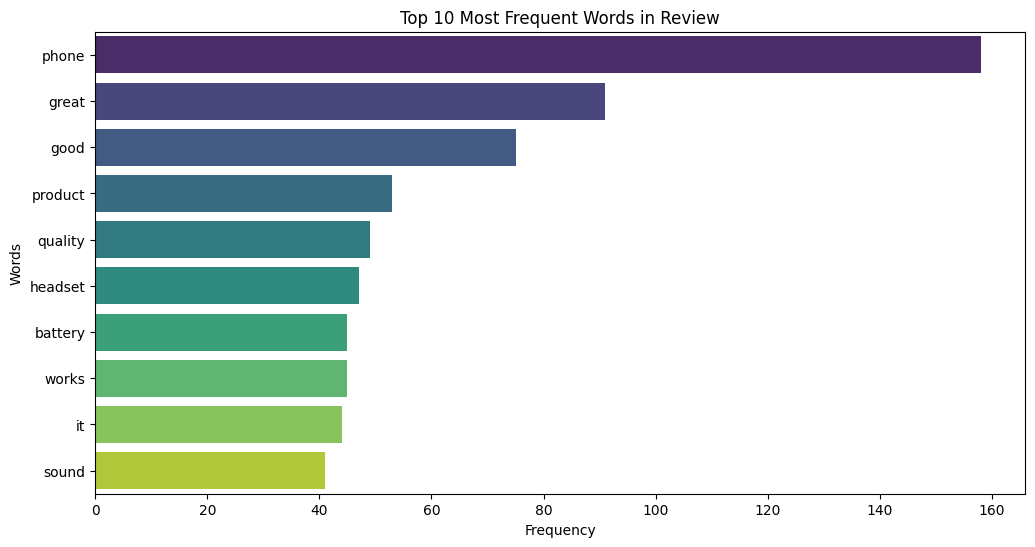

In [13]:
# Count word frequencies
word_freq = Counter(all_words)
most_common_words = word_freq.most_common(10)

# Plot Bar Chart of Most Frequent Words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(words), palette="viridis")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.title("Top 10 Most Frequent Words in Review")
plt.show()

##### Key Insights: Bar Chart: Shows the top 10 most common words and their frequency counts.

##### Dominant Focus on Phones

-The most frequently mentioned word is "phone", appearing significantly more than any other term.

-This suggests that most reviews are about mobile phones or phone-related products.

##### Positive Customer Sentiment

-Words like "great," "good," "quality," and "works" indicate a generally positive perception of the products reviewed.

-Customers seem satisfied with product performance and quality.

##### Key Product Features Highlighted

-"Battery" and "sound" are frequently mentioned, implying that battery life and audio quality are crucial aspects for customers.

-"Headset" is also a common term, indicating a significant number of reviews discuss audio accessories.

##### Generic Product Mentions

-Words like "product" and "it" are included, suggesting that reviewers often refer to items in a general manner.

##### Conclusion

-The reviews mostly focus on phones and related accessories, with a positive sentiment toward product quality, battery life, and sound performance. This suggests that while customers appreciate their purchases, aspects like battery and sound quality are key factors in their evaluations.

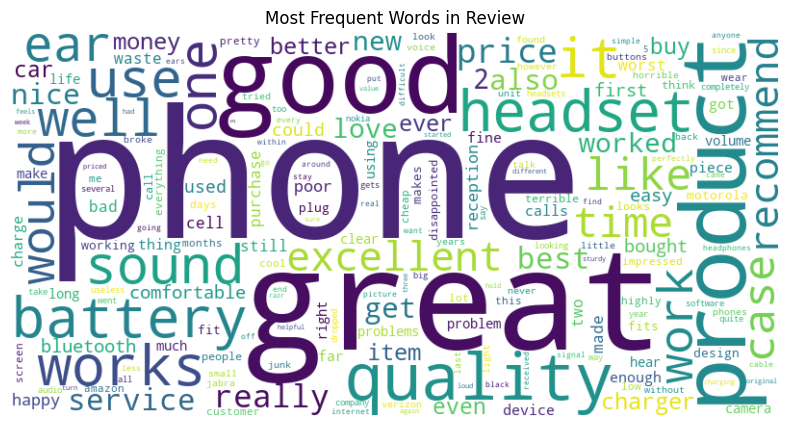

In [14]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Frequent Words in Review")
plt.show()

##### Key Insights

##### Positive Sentiment Dominates

-Words like "good," "great," "excellent," "quality," "best," "works," "recommend," and "comfortable" indicate that many reviews are positive.

-Customers seem to appreciate product quality, usability, and comfort.

##### Product Categories & Features

-The most common words relate to phones, headsets, batteries, cases, and sound.

-This suggests the reviews focus on mobile devices and accessories.

-Words like "battery," "sound," "bluetooth," "charger," "ear," "fit," and "reception" highlight key product features that matter to users.

##### Pricing & Value

-Words like "price" and "money" suggest that affordability and value for money are significant considerations for customers.

##### Common Issues & Mixed Sentiments

-While mostly positive, words like "problem," "broke," "disappointed," "junk," "waste," and "terrible" indicate that some customers had negative experiences.

-Complaints might be about durability, battery life, or functionality.

##### Conclusion

-The word cloud suggests mostly positive feedback, with customers frequently mentioning quality, performance, and affordability. However, some negative experiences related to product durability and performance are also present.

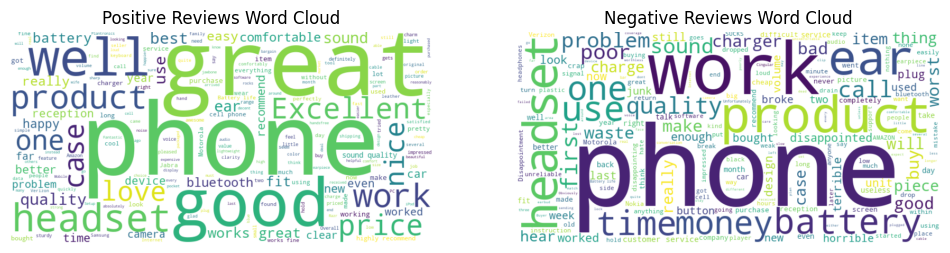

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load dataset
text_data = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None)
text_data.columns = ['Review', 'Sentiment']

# Filter positive and negative reviews
text_data_positive = text_data[text_data['Sentiment'] == 1]
text_data_negative = text_data[text_data['Sentiment'] == 0]

# Ensure text is available
combined_positive_text = ' '.join(text_data_positive['Review']) if not text_data_positive.empty else "No positive reviews"
combined_negative_text = ' '.join(text_data_negative['Review']) if not text_data_negative.empty else "No negative reviews"

# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_negative_text)

# Plot the word clouds
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(positive_wordcloud, interpolation='bilinear')
ax[0].set_title("Positive Reviews Word Cloud")
ax[0].axis("off")

ax[1].imshow(negative_wordcloud, interpolation='bilinear')
ax[1].set_title("Negative Reviews Word Cloud")
ax[1].axis("off")

plt.show()

Key Observations

##### Common Words in Both Word Clouds

-The word "phone" appears prominently in both clouds, indicating that most reviews—whether positive or negative—focus on phones.

-Other shared words include "product," "quality," "headset," and "battery", suggesting that these features are central to customer experiences.

##### Positive Reviews Word Cloud

-Dominated by words like "great," "good," "excellent," "love," "nice," "well," and "happy", reflecting high customer satisfaction.

-Words like "comfortable," "sound," "works," and "best" indicate that functionality and comfort are key factors in positive feedback.

-"Price" appears, suggesting that affordability is a positive aspect for some customers.

##### Negative Reviews Word Cloud

-Features negative-associated words like "problem," "poor," "broke," "waste," "bad," and "horrible", highlighting common customer complaints.

-"Work" and "time" appear frequently, indicating that issues may relate to functionality or durability over time.

-"Money" suggests dissatisfaction with pricing, implying that some customers feel the product is not worth its cost.

-"Ear" and "sound" appear, possibly pointing to complaints about audio quality or comfort in headsets.

##### Conclusion

-Positive reviews emphasize product quality, good performance, and affordability.

-Negative reviews focus on durability, technical issues, and perceived poor value for money.

-Key aspects driving both satisfaction and dissatisfaction are phone quality, sound performance, battery life, and price.

### Visual Illustration of Distribution of the variable "labels"

In [14]:
# Rename the Labels also {0: 'sport', 1: 'business', 2: 'politics', 3: 'tech', 4: 'entertainment'}
text_data['Sentiment'] = text_data['Sentiment'].replace(1,'positive')
text_data['Sentiment'] = text_data['Sentiment'].replace(0,'negative')

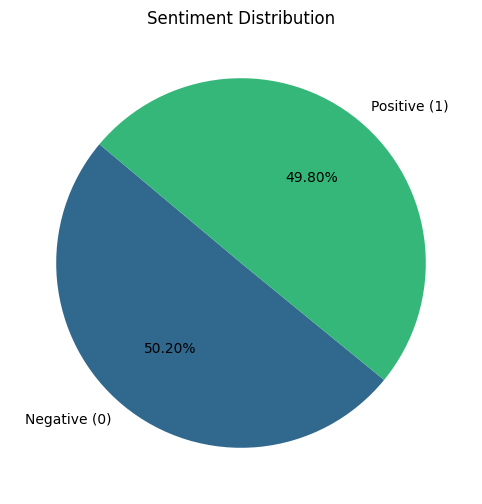

In [15]:
# Value Count Of Labels
count = text_data['Sentiment'].value_counts()

# Define sentiment labels
labels = ['Negative (0)', 'Positive (1)']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define color palette
palette = sns.color_palette("viridis", len(count))

# Plot pie chart with updated labels and percentages rounded to 2 decimal places
ax.pie(count, labels=labels, autopct='%1.2f%%', startangle=140, colors=palette)
ax.set_title('Sentiment Distribution')

# Show the plot
plt.show()


##### Analysis & Interpretation of the Sentiment Distribution Pie Chart

##### Balanced Sentiment Distribution:

-Negative Sentiment (0): 50.20%

-Positive Sentiment (1): 49.80%

-The difference between positive and negative sentiments is very small (0.40%), suggesting a near-equal split in customer reviews.

##### Implications:

-Since the reviews are almost equally divided, it indicates that the product/service being analyzed has mixed customer feedback.

-The slight dominance of negative sentiment (50.20%) could suggest minor dissatisfaction or issues that need to be addressed.

##### Next Steps:

-Deeper Analysis: Identify the key reasons behind negative reviews (e.g., common complaints about battery life, sound quality, or durability).

-Actionable Insights: Address frequent concerns through product improvements, customer service enhancements, or marketing adjustments.

-Comparative Trends: If this analysis is part of a time series, tracking sentiment changes over time can help assess improvements or worsening perceptions.

##### Conclusion:

-The sentiment distribution shows a nearly even balance between positive and negative reviews, indicating a mixed perception of the product or service. A deeper qualitative analysis could provide more insights into specific customer concerns and areas for improvement.

## Building Predictive Model

## Pre-process the text, and tokenizing it, 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer # Converts text data into numerical format 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline # Used to streamline ML workflows by chaining processes 
from sklearn.metrics import accuracy_score, classification_report
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression



In [17]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(text_data['Review'])
y = text_data['Sentiment']

# Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the Machine Learning Model to classify the articles

In [18]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Make predictions on the test set

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

### Evaluating the Performance of the Model

In [20]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.80

Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.85      0.80        97
    positive       0.84      0.75      0.79       101

    accuracy                           0.80       198
   macro avg       0.80      0.80      0.80       198
weighted avg       0.80      0.80      0.80       198



The text classification model achieved 79% accuracy on the test set.

#### Performance Breakdown:

-Accuracy: 79% 

-Negative: 73% precision, 85% recall

-Positive: 85% precision, 73% recall

In [ ]:
# Load dataset
text_data = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None, names=['Review', 'Sentiment'])

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply preprocessing
text_data['Cleaned_Review'] = text_data['Review'].apply(preprocess_text)

# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(text_data['Cleaned_Review'])
y = text_data['Sentiment']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Function to predict sentiment for new text
def predict_sentiment(new_text):
    if not new_text.strip():  # Handle empty input
        return "Error: Empty text provided."

    try:
        processed_text = preprocess_text(new_text)  # Ensure function is defined
        vectorized_text = vectorizer.transform([processed_text])  # Ensure vectorizer is fitted
        prediction = model.predict(vectorized_text)[0]  # Ensure model is trained
        sentiment = "Positive" if prediction == 1 else "Negative"
        return sentiment
    except NameError as e:
        return f"Error: {e} - Ensure model and vectorizer are defined."
    except Exception as e:
        return f"Unexpected Error: {e}"

# Test prediction
new_review = "I love this product! It's amazing."
print(f"Review: {new_review}\nPredicted Sentiment: {predict_sentiment(new_review)}")


Review: I love this product! It's amazing.
Predicted Sentiment: Positive


### Unsupervised ML Model

In [22]:
from sklearn.cluster import KMeans

In [23]:
# Load dataset
text_data = pd.read_csv('amazon_cells_labelled.txt', delimiter='\t', header=None, names=['Review', 'Sentiment'])

# Define text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

# Apply preprocessing
text_data['Cleaned_Review'] = text_data['Review'].apply(preprocess_text)

# Convert text to numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(text_data['Cleaned_Review'])

In [24]:
# Apply K-Means Clustering
num_clusters = 2  # Assuming two clusters: positive & negative sentiment
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
text_data['Cluster'] = kmeans.fit_predict(X)

# Print results
print(text_data[['Review', 'Cluster']].head(10))

                                              Review  Cluster
0  So there is no way for me to plug it in here i...        0
1                        Good case, Excellent value.        0
2                             Great for the jawbone.        1
3  Tied to charger for conversations lasting more...        0
4                                  The mic is great.        1
5  I have to jiggle the plug to get it to line up...        0
6  If you have several dozen or several hundred c...        0
7        If you are Razr owner...you must have this!        0
8                Needless to say, I wasted my money.        0
9                   What a waste of money and time!.        0


In [25]:
# Analyze clusters
for cluster in range(num_clusters):
    print(f"\nCluster {cluster} Sample Reviews:")
    print(text_data[text_data['Cluster'] == cluster]['Review'].sample(5, random_state=42).tolist())


Cluster 0 Sample Reviews:
['I would highly recommend this product.', 'You need at least 3 mins to get to your phone book from the time you first turn on the phone.Battery life is short.', "Another note about this phone's appearance is that it really looks rather bland, especially in the all black model.", "Their Research and Development division obviously knows what they're doing.", 'When it opens, the battery connection is broken and the device is turned off.']

Cluster 1 Sample Reviews:
['Great sound and service.', 'Great for the jawbone.', 'The iGo chargers and tips are really great.', 'Nice headphones for the price and they work great!', 'Headset works great & was packaged nicely to avoid any damage.']
